<a href="https://colab.research.google.com/github/arikaran007/detection/blob/main/potato_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/PlantVillages.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models

In [ ]:
BATCH_SIZE=32
IMAGE_SIZE=256

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE

)

Found 2152 files belonging to 3 classes.


In [ ]:
dataset.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

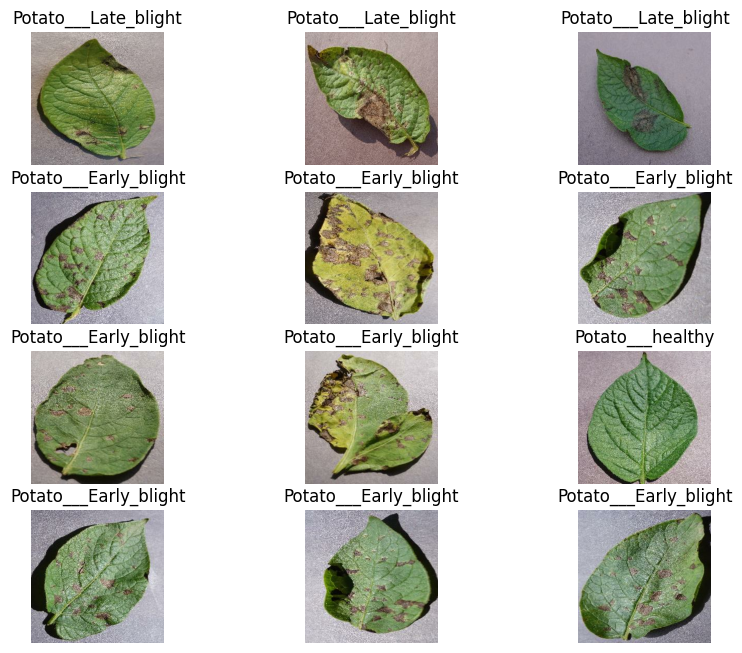

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
 for i in range(12):
  axis=plt.subplot(5,3,i+1)
  plt.imshow(image_batch[i].numpy().astype('uint8'))
  plt.title(dataset.class_names[label_batch[i]])
  plt.axis('off')


In [ ]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds=dataset.take(54)

In [ ]:
test_ds=dataset.skip(54)


In [ ]:
valid_size=0.1
len(dataset)*valid_size

6.800000000000001

In [ ]:
test_ds=test_ds.skip(6)
valid_ds=test_ds.take(6)

In [ ]:
len(train_ds)

54

In [ ]:
len(test_ds)

8

In [ ]:
len(valid_ds)

6

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):

   ds_size=len(ds)
   if shuffle:
    ds=ds.shuffle(shuffle_size)

   train_size=int(train_split*ds_size)
   valid_size=int(val_split*ds_size)

   train_ds=ds.take(train_size)
   valid_ds=ds.skip(train_size).take(valid_size)
   test_ds=ds.skip(train_size).skip(valid_size)

   return train_ds,valid_ds,test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds=valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
rescale_and_resizing=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
CHANNELS=3

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model = models.Sequential([
    rescale_and_resizing,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_shape),
    layers.MaxPooling2D((2,2),padding='same'),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 128, 128, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 128, 128, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 64, 64, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=15
)

Epoch 1/15
54/54 [==============================] - 6s 118ms/step - loss: 0.2062 - accuracy: 0.9208 - val_loss: 0.2304 - val_accuracy: 0.9115
Epoch 2/15
54/54 [==============================] - 8s 156ms/step - loss: 0.1547 - accuracy: 0.9366 - val_loss: 0.4264 - val_accuracy: 0.8385
Epoch 3/15
54/54 [==============================] - 6s 118ms/step - loss: 0.1351 - accuracy: 0.9513 - val_loss: 0.0983 - val_accuracy: 0.9688
Epoch 4/15
54/54 [==============================] - 14s 260ms/step - loss: 0.1566 - accuracy: 0.9396 - val_loss: 0.2916 - val_accuracy: 0.8490
Epoch 5/15
54/54 [==============================] - 7s 131ms/step - loss: 0.1617 - accuracy: 0.9372 - val_loss: 0.1310 - val_accuracy: 0.9271
Epoch 6/15
54/54 [==============================] - 5s 98ms/step - loss: 0.1313 - accuracy: 0.9501 - val_loss: 0.1728 - val_accuracy: 0.9323
Epoch 7/15
54/54 [==============================] - 5s 96ms/step - loss: 0.1025 - accuracy: 0.9589 - val_loss: 0.1065 - val_accuracy: 0.9688
Epoch 8

In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 0s 28ms/step - loss: 0.0652 - accuracy: 0.9766


In [ ]:
scores

[0.06521720439195633, 0.9765625]

In [ ]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['accuracy']

[0.9207746386528015,
 0.9366196990013123,
 0.9512910842895508,
 0.93955397605896,
 0.9372065663337708,
 0.9501173496246338,
 0.9589201807975769,
 0.9553990364074707,
 0.966549277305603,
 0.9730046987533569,
 0.9671361446380615,
 0.9806337952613831,
 0.9759389758110046,
 0.9735915660858154,
 0.9724178314208984]

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

15

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

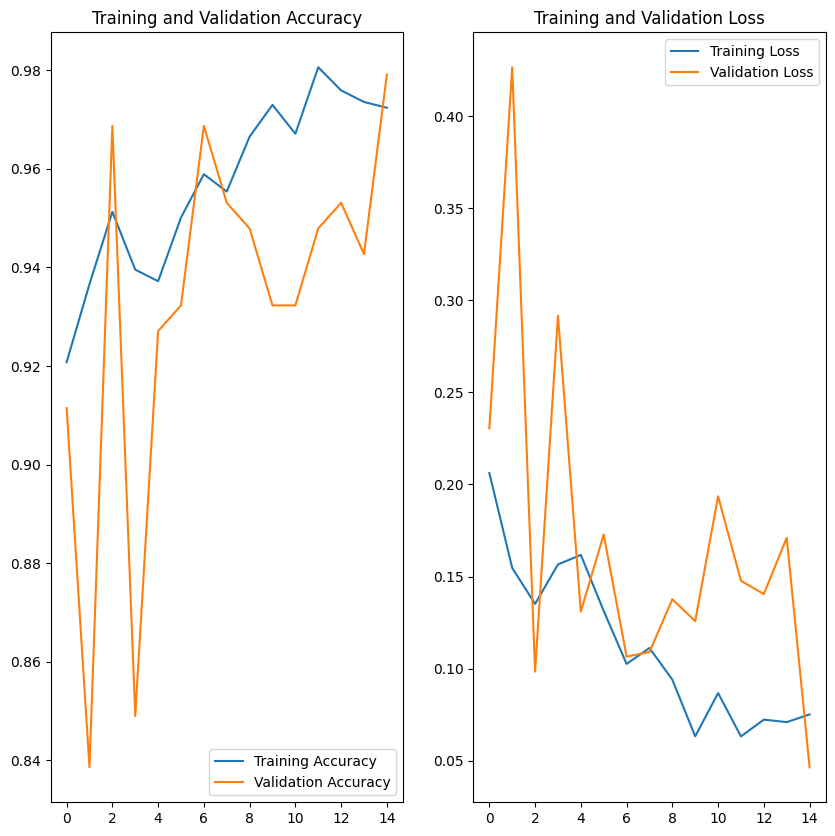

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(range(15), acc, label='Training Accuracy')
plt.plot(range(15), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(15), loss, label='Training Loss')
plt.plot(range(15), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

predicted
actual: Potato___Late_blight
1/1 [==============================] - 0s 39ms/step
predicted_label: Potato___Late_blight


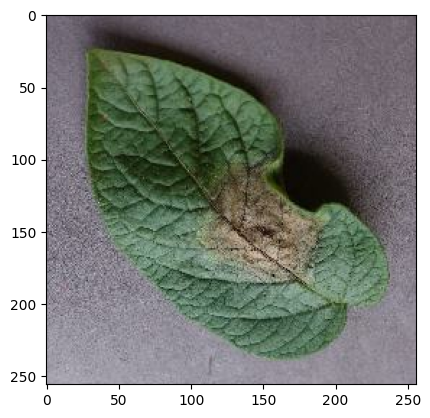

In [ ]:
for  images_batch,labels_batch in dataset.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print("predicted")
  plt.imshow(first_image)
  print("actual:",dataset.class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted_label:",dataset.class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)

  predicted_class = dataset.class_names[np.argmax(predictions[0])]
  confidence = round(100 * (np.max(predictions[0])), 2)
  return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


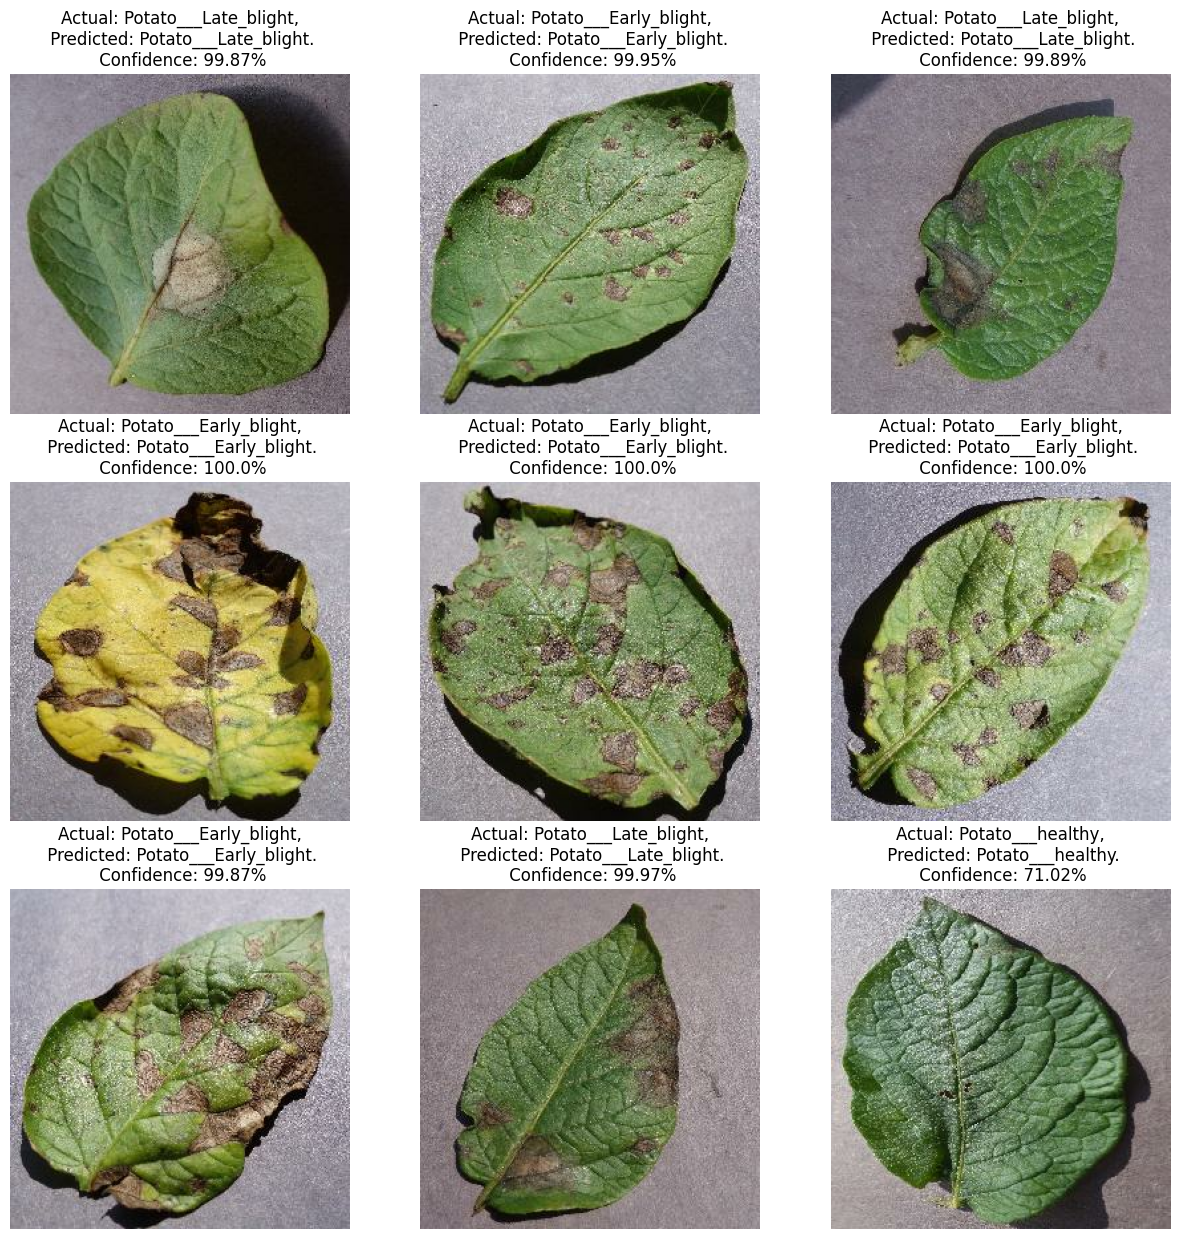

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = dataset.class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")